In [1]:
import numpy as np
import pandas as pd

In [2]:
#initializing the dataframe we will use
#it will have 3 columns which will be CGPA, Rsume Score and LPA
df = pd.DataFrame([[8, 8, 4], [7, 9, 5], [6, 10, 6], [5, 12, 7]],
                  columns= ['CGPA', 'Resume_score', 'LPA'])

In [3]:
df

,CGPA,Resume_score,LPA
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


# Steps for Training a Neural Network

**Step 1: Initialize Weights and Bias**

In [4]:
#We will provide it the architecture of our neural netwrok like
#if we have 3 features in input, 3 neuron in hidden layer and 1 in output layer
#our network architecture will be (3, 3, 1)
def initialize_parameters(nn_architecture):
  np.random.seed(3)
  #to store parameter's name and the value
  parameters= {}
  #to know how many layers we will have we will take the length of architecture provided as it will have dimension for each layer, length of this list will be number of layers
  number_of_layers= len(nn_architecture)
  #applying for loop on layers to make parameters of each layer
  for layer in range(1, number_of_layers):
    #we will initialize each W of layer with value of 0.1 initially
    #shape of our W parameter will be like (number_of_neuron_of_current x number_of_neuron_in_previous_layer)
    parameters['W'+ str(layer)] = np.ones((nn_architecture[layer-1], nn_architecture[layer])) * 0.1
    #we will initialize our b parameter as 0s in the start
    #shape of our b will be (number_of_neuron_of_current x 1)
    parameters['b' + str(layer)] = np.zeros((nn_architecture[layer], 1))

  return parameters



     
**Architecture**        

                                in1  O
                                          O
                                in2  O

                So we will have 4 weights in W1 (for layer 1), 2 weights for W2
                (for layer 2), 2 biases for layer 1 and 1 bias for layer 2.

In [5]:
#testing initialize parameter function
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [6]:
len(initialize_parameters([2,2,1]))

4

**Step 2: Perform Forward Propagation for Prediction**

Firstly we will make a linear foraward prop function that will be performed at each layer.

In [7]:
#It will take weights, input from previous layer and bias to perform forward propagation
def forward_prop_prediction_function(W, pre_layer_input, b):
  #we will call the output as Z

  #so equation is wx+b
  z= np.dot(W.T, pre_layer_input) + b
  return z


Now Making main function for the forward

In [26]:
#we will give the input and parameters to the function to perform the forward propagation
#each row will be passed to this function as input and the prediction will be calculated
def L_layer_forwar_prop(input, parameters):
  A= input
  #number of layers in neural network
  #parameters will have n params and 2 for each leyers. so number of layers = params/2
  number_of_layers= len(parameters) // 2

  #we will consider input layer too
  for layer in range(1, number_of_layers + 1):
    #calculated output will become input for the next layer
    A_prev= A
    #getting W of that layer
    Wl = parameters['W'+str(layer)]
    #getting bias of that layer
    bl= parameters['b'+str(layer)]

    # print('A' + str(layer-1)+':', A_prev)
    # print('W' + str(layer)+ ":", Wl)
    # print('b' + str(layer)+":", bl)
    # print('----------------------------------------------')


    #prediction will be made according to linear function defined above
    #calculating output for the layer and it will become input for the next layer
    A= forward_prop_prediction_function(A_prev, Wl, bl)
    # print("A"+ str(layer) + ":", A)
    # print("**********************************************")

  #it will return the output of current layer and the its input means output of previous layer
  return A, A_prev



In [27]:
#lets pass the first training example to our function
#input will be cgpa and resume score of the student and out will be lpa

#its shape will be (number of features x no of training examples)
x= df[['CGPA', 'Resume_score']].values[0].reshape(2,1)
#output label
y= df[['LPA']].values[0][0]

#initialize parameters
parameters= initialize_parameters([2,2,1])

y_hat, A1= L_layer_forwar_prop(x, parameters)


A1 is the ouput of hidden layer that used input of example and 4 weights to calculate it.

In [28]:
A1

array([[1.6, 1.6],
       [1.6, 1.6]])

yhat is the ouput of final output layer that uses A1 and wrights

In [29]:
y_hat

array([[0.32],
       [0.32]])

In [30]:
#similarly for other examples
X3 = df[['CGPA', 'Resume_score']].values[3].reshape(2,1) # Shape(no of features, no. of training example)
y3= df[['LPA']].values[3][0]

y_hat,A1 = L_layer_forwar_prop(X3, parameters)

**Step 3: Calculate Loss**

In [31]:
loss = (y - y_hat) ** 2
loss

array([[13.3956],
       [13.3956]])

**Step 4: Update Parameters according to their optimal Value after finding gradient of Loss with each Parameter**

Derivatives values have been calcualted.

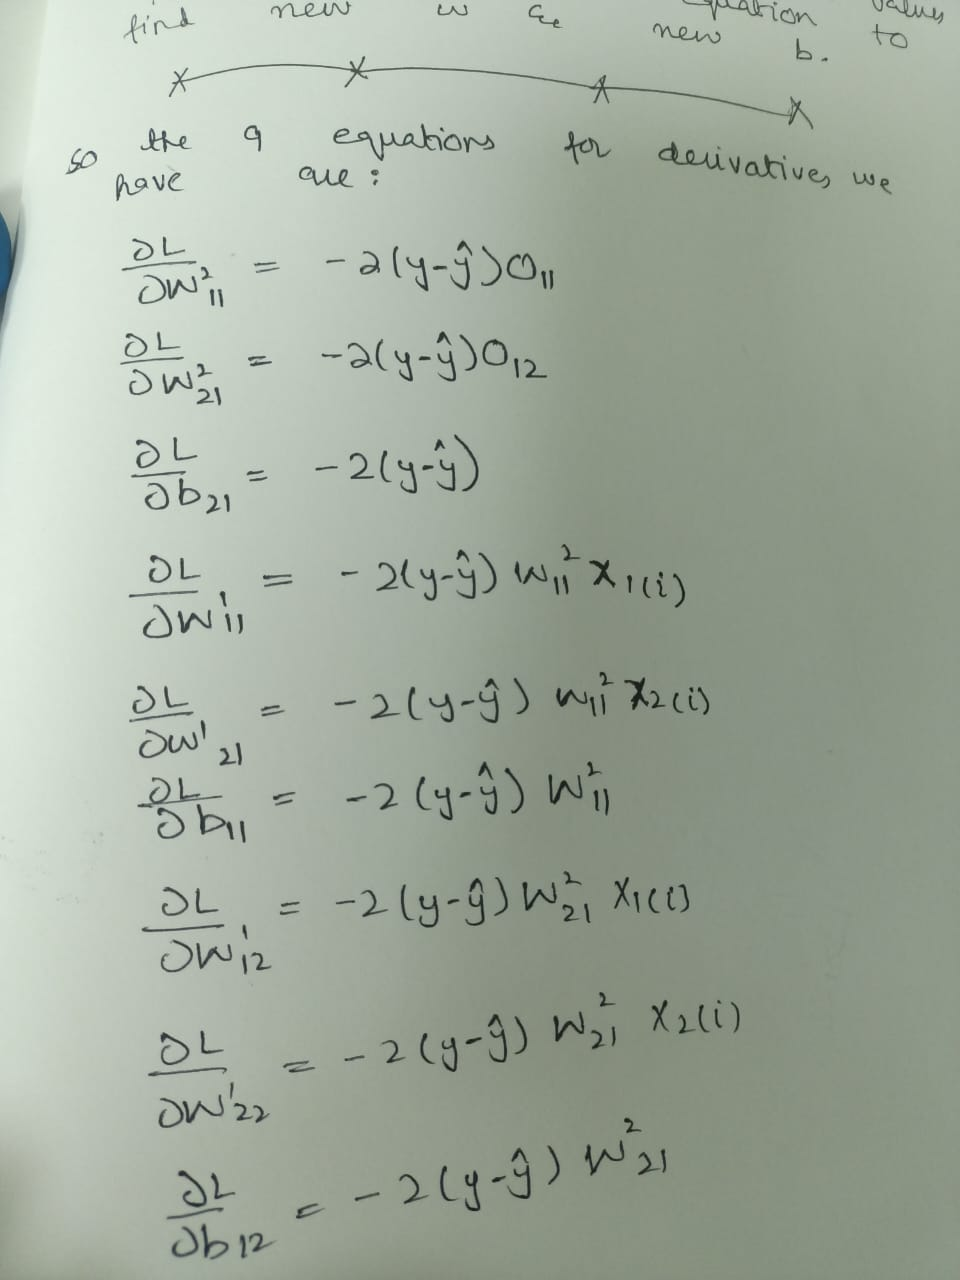

In [32]:
def update_parameters(paramters, y, y_hat, A1, X):
  #implementing the Gradient Descent equation for the value of the optimal weights

  #Layer 2 (Output Layer)
  #W_new = W_old - alpha*dL/dW
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  #b_new b_old - alpha*dL/db
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  #Layer 1 (hidden layer)
  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [33]:
X = df[['CGPA', 'Resume_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['LPA']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forwar_prop(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

**For all examples**

In [34]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 5

for i in range(epochs):
#to store the loss calculated for each exampel
  Loss = []

  #we will consider all examples
  for j in range(df.shape[0]):

    X = df[['CGPA', 'Resume_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['LPA']].values[j][0]

    y_hat,A1 = L_layer_forwar_prop(X,parameters)
    #extracting y_hat
    y_hat = y_hat[0][0]

    #updating the parameters
    update_parameters(parameters,y,y_hat,A1,X)

    #appending the loss of each example
    Loss.append((y-y_hat)**2)

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  25.405116937301145
Epoch -  2 Loss -  19.34045598599946
Epoch -  3 Loss -  11.742224357705648
Epoch -  4 Loss -  5.286130313056807
Epoch -  5 Loss -  2.155173447583169


{'W1': array([[0.29869661, 0.43946199],
        [0.29869661, 0.43946199]]),
 'b1': array([[0.03284641],
        [0.03284641]]),
 'W2': array([[0.46364102],
        [0.46364102]]),
 'b2': array([[0.46802304]])}

# Training a Keras Neural Network for Comparison

In [35]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [36]:
model = Sequential()

#as out architecture was [2,2,1]
model.add(Dense(2, activation= 'linear', input_dim= 2))
model.add(Dense(1, activation= 'linear'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
#initial wrights that keras gave to each parameter
model.get_weights()

[array([[-0.32907248,  0.37544155],
        [ 0.30439687, -0.02102852]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.1060017 ],
        [-0.26510096]], dtype=float32),
 array([0.], dtype=float32)]

In [39]:
#lets set these weights to 0.1 as we did above to make the initial weights similar
new_weights= [np.array([[0.1, 0.1],
                        [0.1, 0.1]], dtype= np.float32),
              np.array([0., 0.], dtype= np.float32),

              np.array([[0.1],
                        [0.1]], dtype= np.float32),
              np.array([0.], dtype= np.float32)]

In [40]:
#setting the initial weights to weights that we have defined
model.set_weights(new_weights)

In [42]:
#now if we see weights
model.get_weights()

[array([[0.1, 0.1],
        [0.1, 0.1]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.1],
        [0.1]], dtype=float32),
 array([0.], dtype=float32)]

In [43]:
#as we had learning rate of 0.001
optimizer= keras.optimizers.Adam(learning_rate= 0.001)

#compiling the model with mse loss function
model.compile(loss= 'mean_squared_error', optimizer= optimizer)

In [51]:
#first two columns values
x= df.iloc[:, 0:2].values
#LPa column is our label column
y= df['LPA'].values

In [52]:
x

array([[ 8,  8],
       [ 7,  9],
       [ 6, 10],
       [ 5, 12]])

In [53]:
y

array([4, 5, 6, 7])

In [59]:
#training model over our data
model.fit(x, y, epochs= 65, verbose= 1, batch_size= 1)

Epoch 1/65
4/4 [==============================] - 0s 10ms/step - loss: 1.0142
Epoch 2/65
4/4 [==============================] - 0s 17ms/step - loss: 1.0113
Epoch 3/65
4/4 [==============================] - 0s 12ms/step - loss: 1.0072
Epoch 4/65
4/4 [==============================] - 0s 13ms/step - loss: 1.0061
Epoch 5/65
4/4 [==============================] - 0s 13ms/step - loss: 1.0081
Epoch 6/65
4/4 [==============================] - 0s 10ms/step - loss: 1.0040
Epoch 7/65
4/4 [==============================] - 0s 15ms/step - loss: 0.9983
Epoch 8/65
4/4 [==============================] - 0s 14ms/step - loss: 0.9970
Epoch 9/65
4/4 [==============================] - 0s 11ms/step - loss: 0.9952
Epoch 10/65
4/4 [==============================] - 0s 21ms/step - loss: 0.9923
Epoch 11/65
4/4 [==============================] - 0s 12ms/step - loss: 0.9921
Epoch 12/65
4/4 [==============================] - 0s 7ms/step - loss: 0.9903
Epoch 13/65
4/4 [==============================] - 0s 10ms/ste